In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

 ## imporing the dataset

In [2]:
data = pd.read_csv('F:\Heart\Model\heart_failure_clinical_records_dataset.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(299, 13)

In [5]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


Split whenever you seen like this categorical and continuos data

In [6]:
categorical_variables = data[["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]]
continuous_variables = data[["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]]

In [7]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
continuous_variables.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [9]:
data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


In [10]:
age = data[["age"]]
platelets = data[["platelets"]]

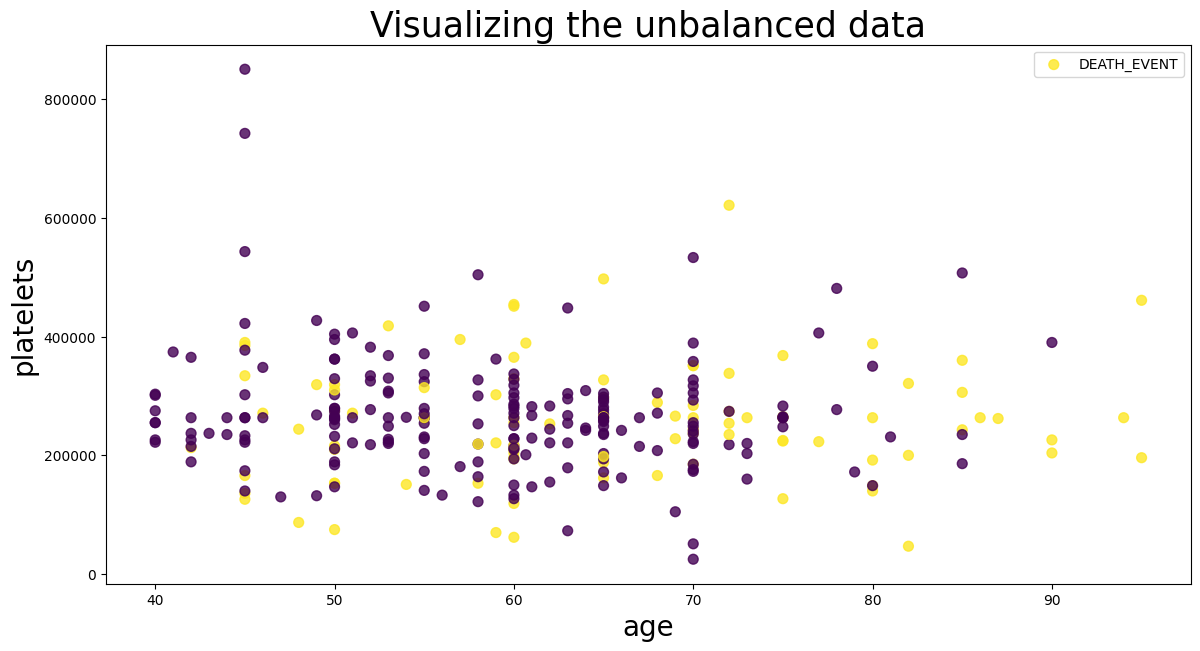

In [11]:
plt.figure(figsize=(14,7))
plt.scatter(age, platelets, c = data['DEATH_EVENT'], s=50, alpha=0.8)
plt.xlabel('age',fontsize=20)
plt.ylabel('platelets',fontsize=20)
plt.title("Visualizing the unbalanced data", fontsize = 25)
plt.legend(['DEATH_EVENT'])
plt.show()

correlation between the data

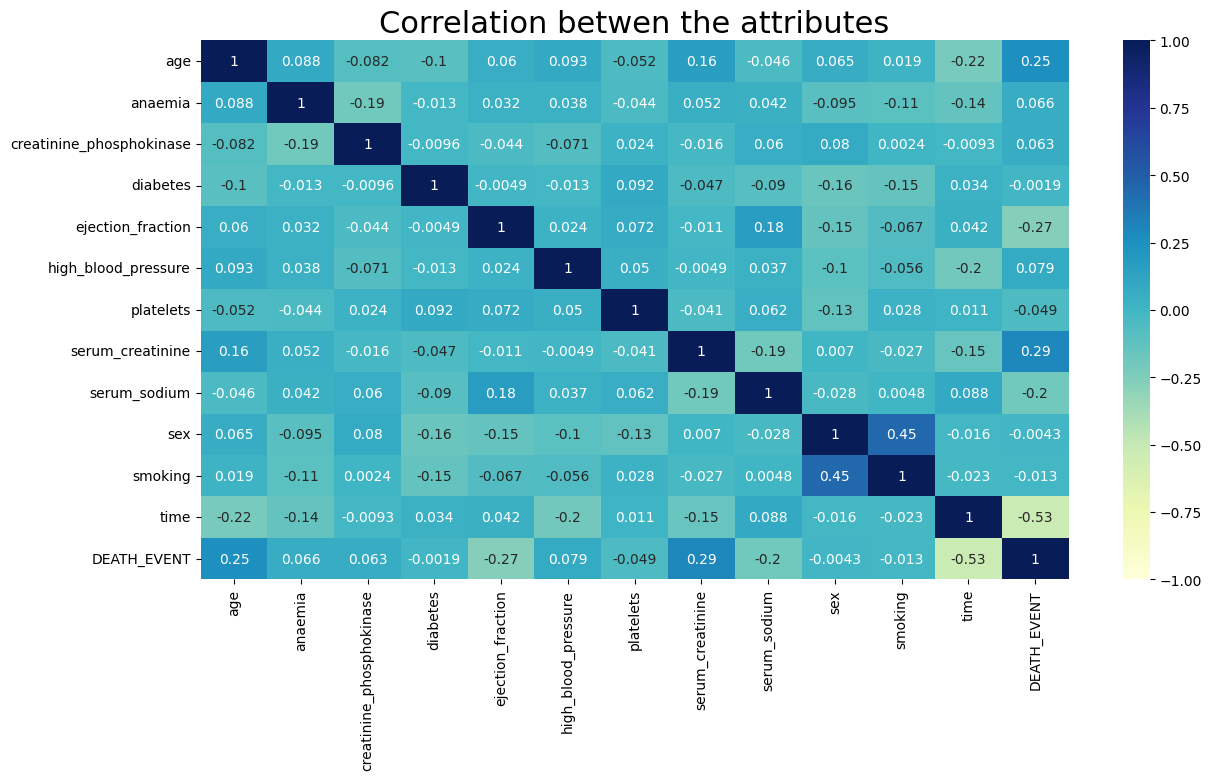

In [12]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap='YlGnBu', annot=True)
plt.title("Correlation betwen the attributes", fontsize=22)
plt.show()



Note:
here we can see that the positive numbers tells that the both attributes are positively correlated 
and negative number tells that the both attributes are negatively correlated

## Data visualization


####Categorical Variables


In [13]:
categorical_variables

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1
...,...,...,...,...,...,...
294,0,1,1,1,1,0
295,0,0,0,0,0,0
296,0,1,0,0,0,0
297,0,0,0,1,1,0


In [14]:
categorical_data = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
continuous_data = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

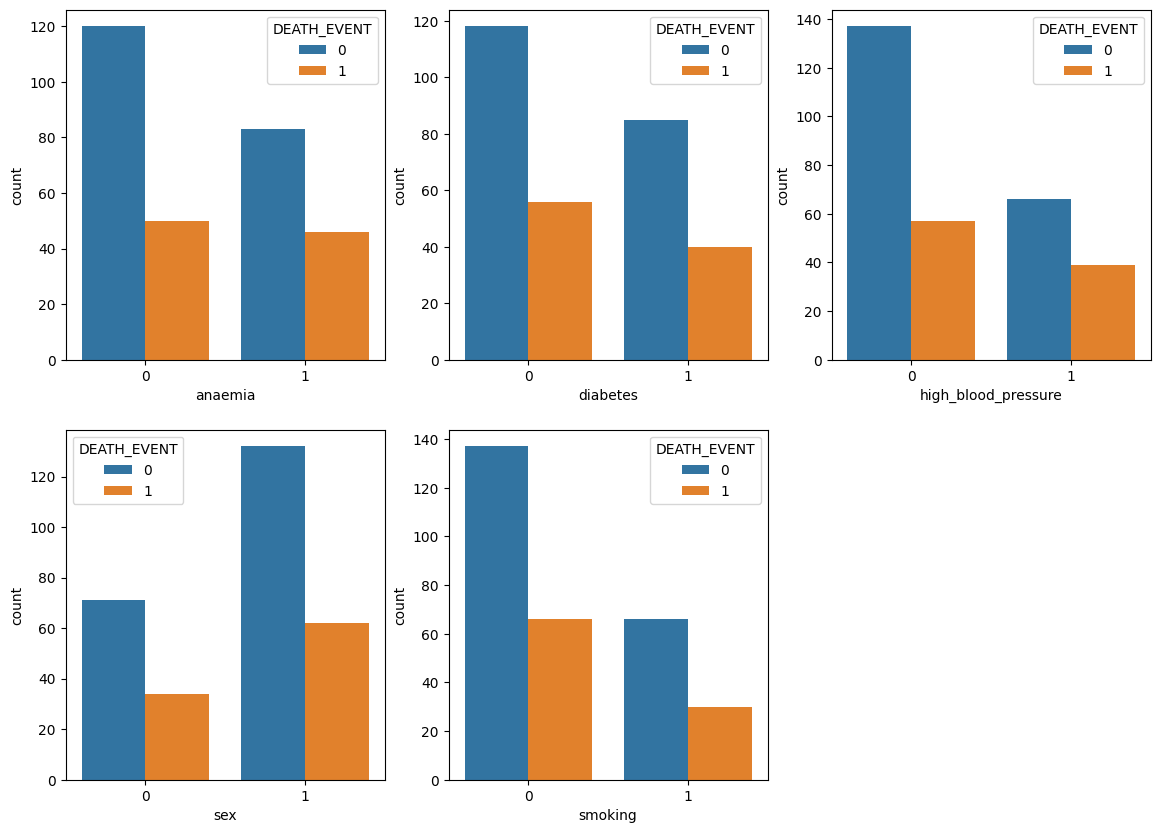

In [15]:
plt.figure(figsize=(14,10))
for i,cat in enumerate(categorical_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data = data, x= cat, hue = "DEATH_EVENT")
plt.show()

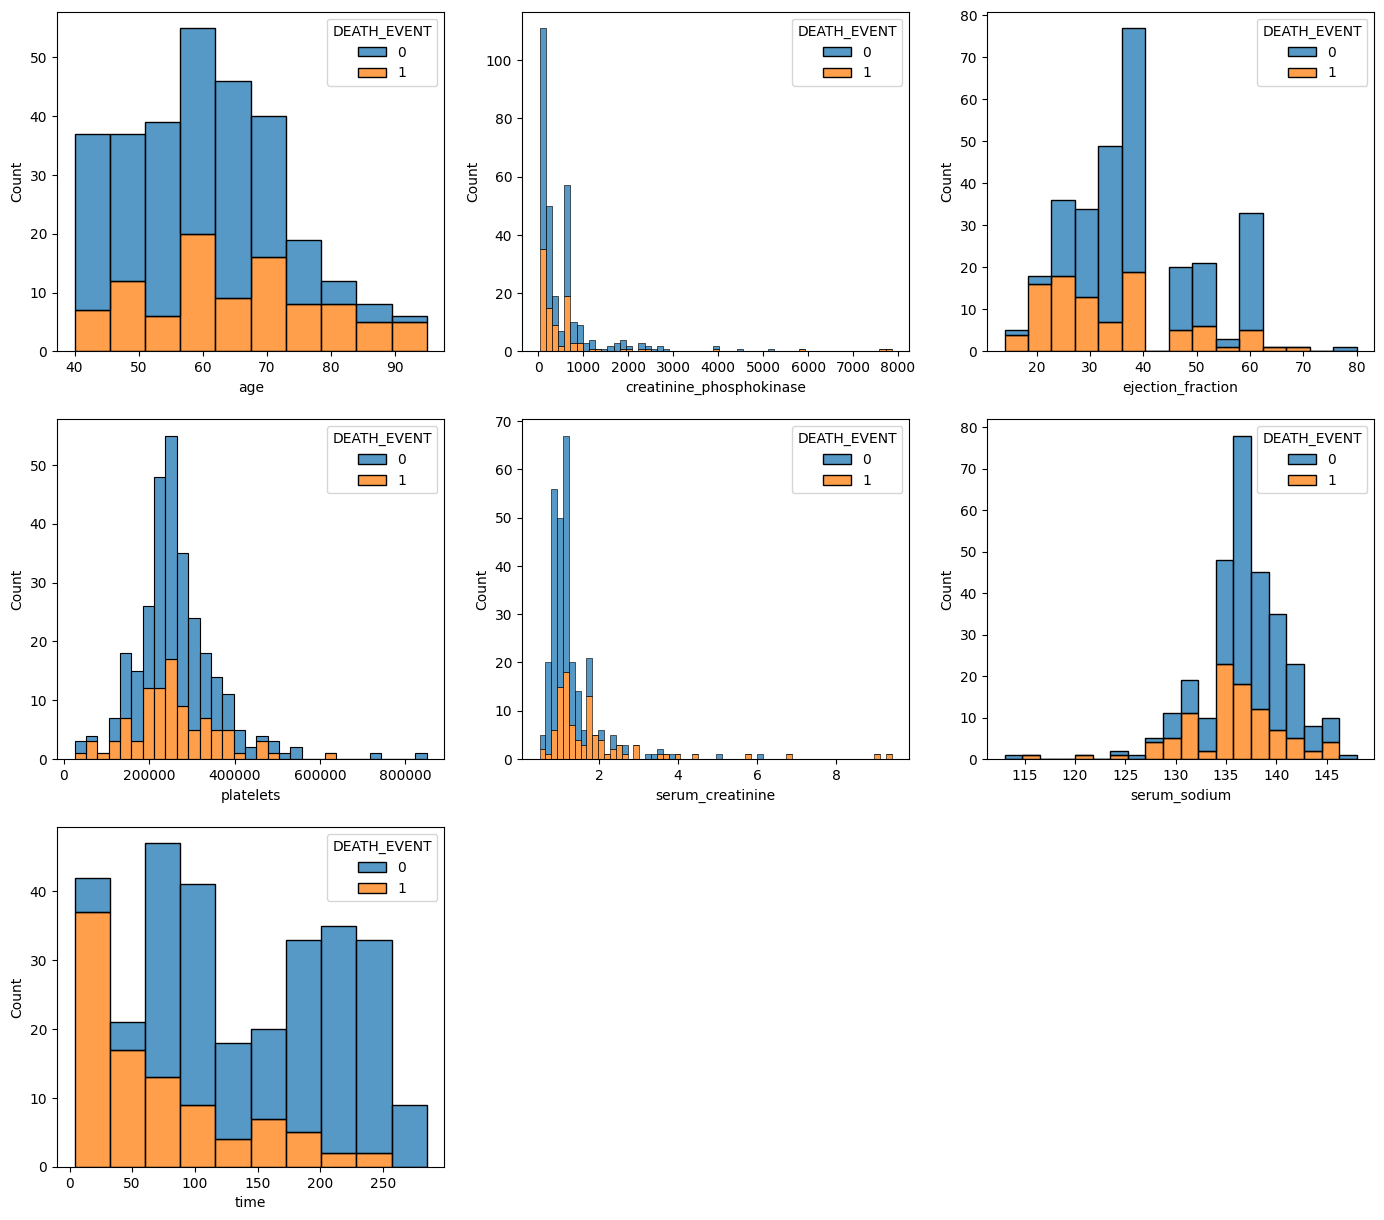

In [16]:
plt.figure(figsize=(17,15))
for j,con in enumerate(continuous_data):
    plt.subplot(3,3,j+1)
    sns.histplot(data = data, x= con, hue = "DEATH_EVENT", multiple="stack")
plt.show()

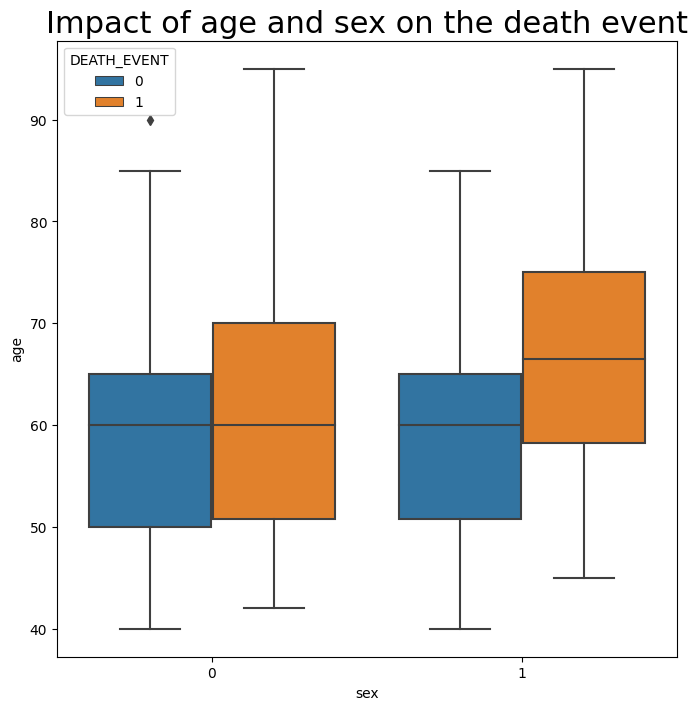

In [17]:
plt.figure(figsize=(8,8))
sns.boxplot(data = data, x="sex", y="age", hue="DEATH_EVENT")
plt.title("Impact of age and sex on the death event", fontsize=22)
plt.show()

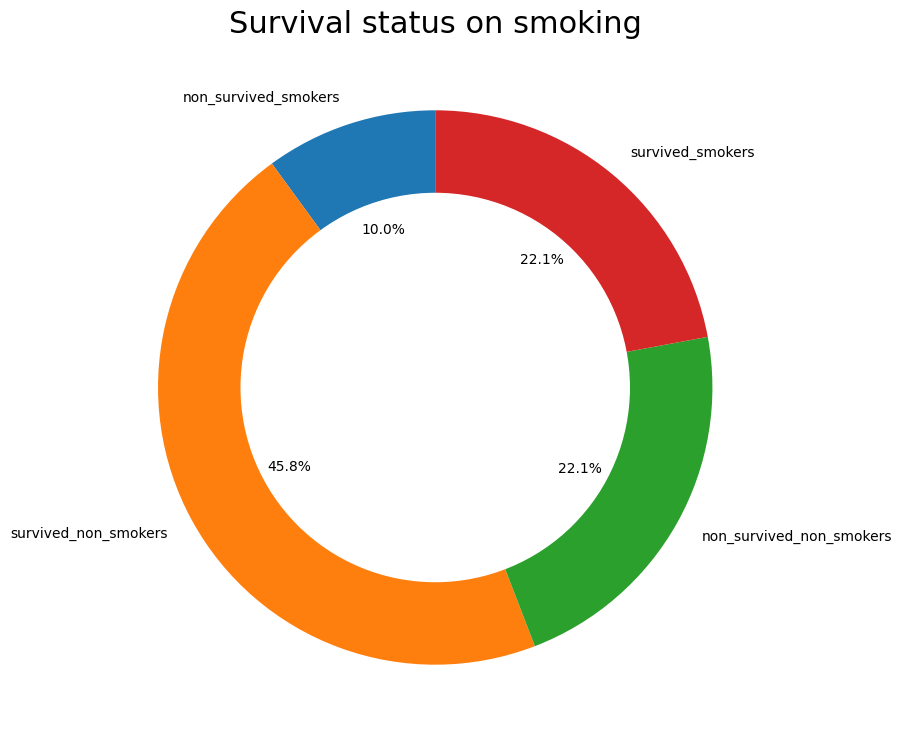

In [18]:
smokers = data[data["smoking"] == 1]
non_smokers = data[data["smoking"] == 0]

non_survived_smokers = smokers[smokers["DEATH_EVENT"] == 1]
survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"] == 0]
non_survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"] == 1]
survived_smokers = smokers[smokers["DEATH_EVENT"] == 0]

smoking_data = [len(non_survived_smokers),len(survived_non_smokers),len(non_survived_non_smokers),len(survived_smokers)]
smoking_labels = ["non_survived_smokers","survived_non_smokers","non_survived_non_smokers","survived_smokers"]

plt.figure(figsize=(9,9))
plt.pie(smoking_data, labels=smoking_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on smoking", fontsize = 22)
plt.show()

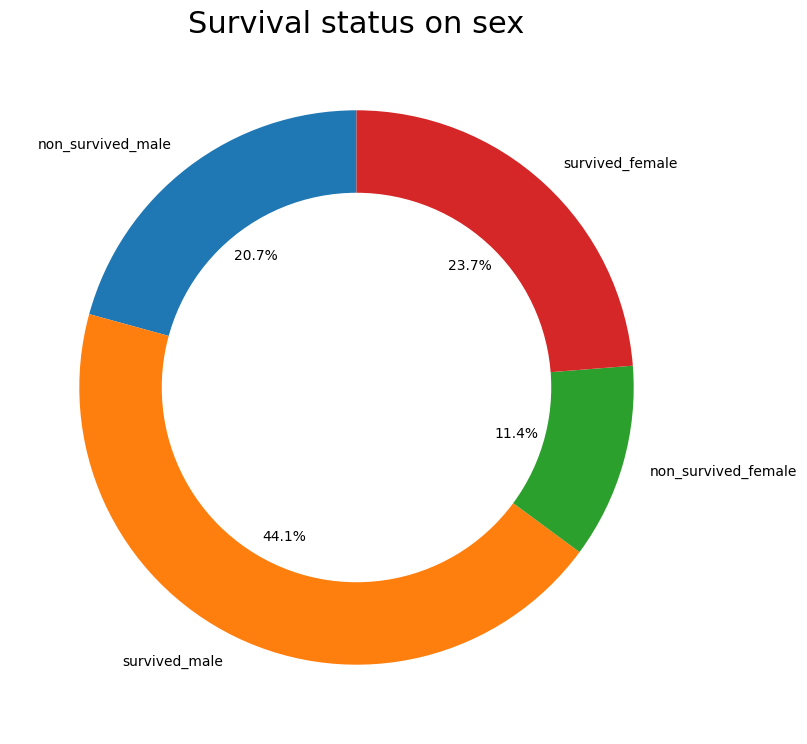

In [19]:
male = data[data["sex"] == 1]
female = data[data["sex"] == 0]

non_survived_male = male[male["DEATH_EVENT"] == 1]
survived_male = male[male["DEATH_EVENT"] == 0]
non_survived_female = female[female["DEATH_EVENT"] == 1]
survived_female = female[female["DEATH_EVENT"] == 0]

sex_data = [len(non_survived_male),len(survived_male),len(non_survived_female),len(survived_female)]
sex_labels = ["non_survived_male","survived_male","non_survived_female","survived_female"]

plt.figure(figsize=(9,9))
plt.pie(sex_data, labels=sex_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on sex", fontsize = 22)
plt.show()

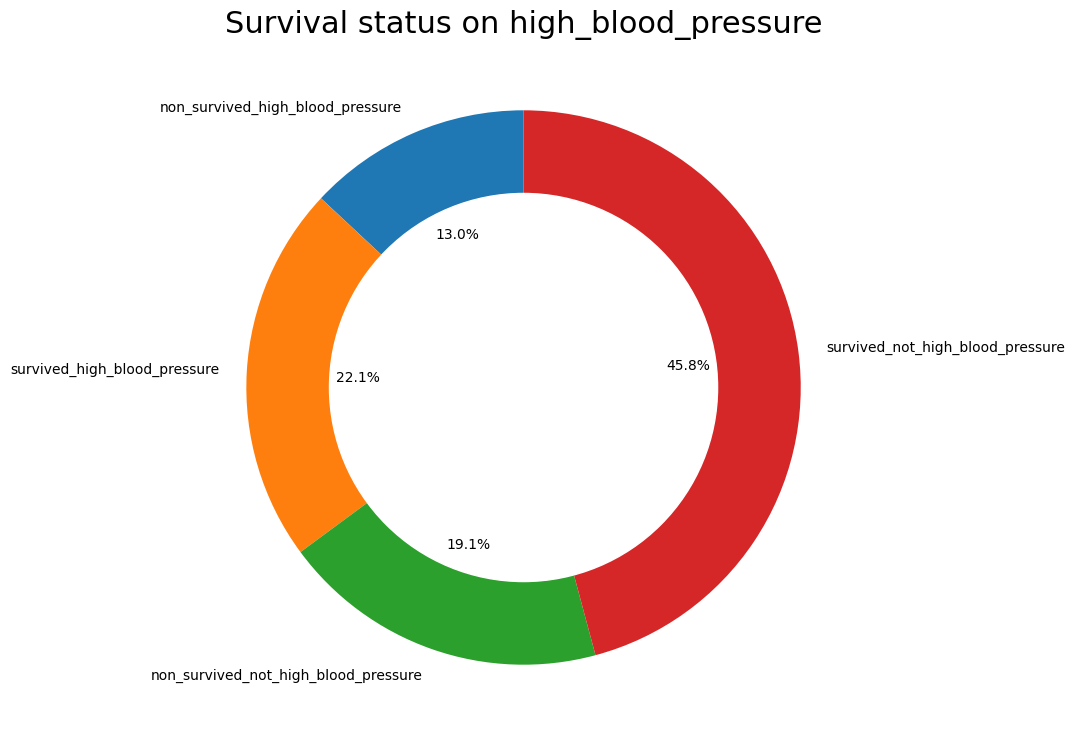

In [20]:
hbp = data[data["high_blood_pressure"] == 1]
nothbp = data[data["high_blood_pressure"] == 0]

non_survived_hbp = hbp[hbp["DEATH_EVENT"] == 1]
survived_hbp = hbp[hbp["DEATH_EVENT"] == 0]
non_survived_nothbp = nothbp[nothbp["DEATH_EVENT"] == 1]
survived_nothbp = nothbp[nothbp["DEATH_EVENT"] == 0]

hbp_data = [len(non_survived_hbp),len(survived_hbp),len(non_survived_nothbp),len(survived_nothbp)]
hbp_labels = ["non_survived_high_blood_pressure","survived_high_blood_pressure","non_survived_not_high_blood_pressure","survived_not_high_blood_pressure"]

plt.figure(figsize=(9,9))
plt.pie(hbp_data, labels=hbp_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on high_blood_pressure", fontsize = 22)
plt.show()

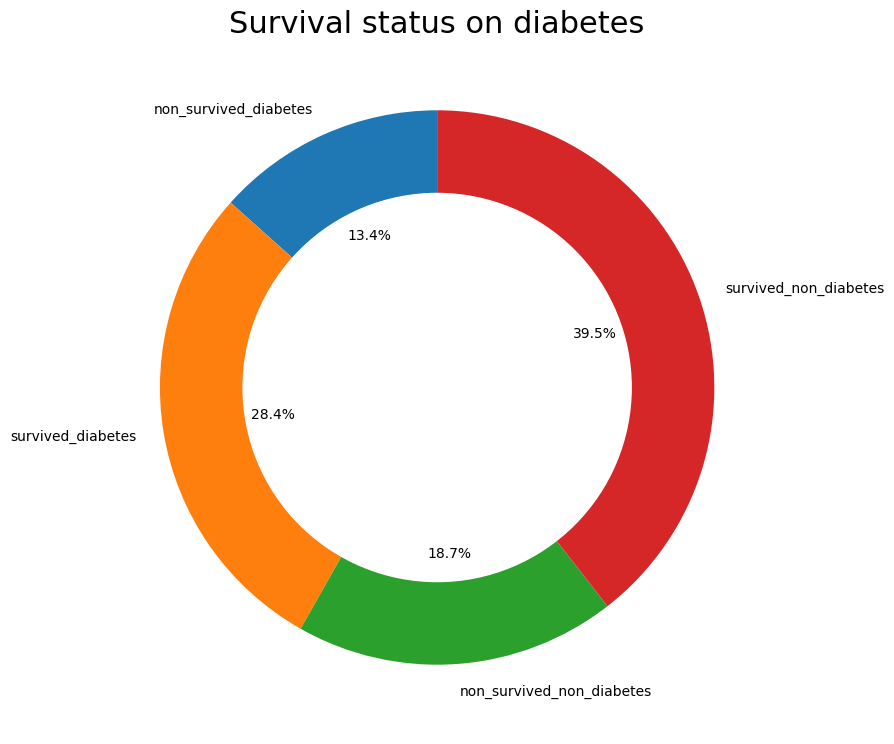

In [21]:
diabetes = data[data["diabetes"] == 1]
non_diabetes = data[data["diabetes"] == 0]

non_survived_diabetes = diabetes[diabetes["DEATH_EVENT"] == 1]
survived_diabetes = diabetes[diabetes["DEATH_EVENT"] == 0]
non_survived_non_diabetes = non_diabetes[non_diabetes["DEATH_EVENT"] == 1]
survived_non_diabetes = non_diabetes[non_diabetes["DEATH_EVENT"] == 0]

diabetes_data = [len(non_survived_diabetes),len(survived_diabetes),len(non_survived_non_diabetes),len(survived_non_diabetes)]
diabetes_labels = ["non_survived_diabetes","survived_diabetes","non_survived_non_diabetes","survived_non_diabetes"]

plt.figure(figsize=(9,9))
plt.pie(diabetes_data, labels=diabetes_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on diabetes", fontsize = 22)
plt.show()

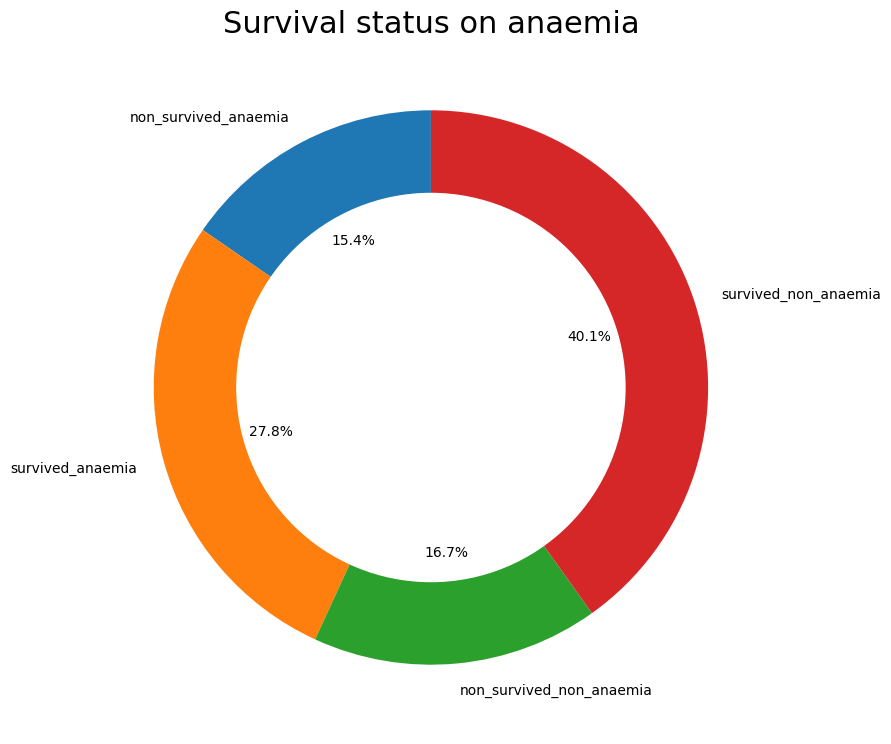

In [22]:
anaemia = data[data["anaemia"] == 1]
non_anaemia = data[data["anaemia"] == 0]

non_survived_anaemia = anaemia[anaemia["DEATH_EVENT"] == 1]
survived_anaemia = anaemia[anaemia["DEATH_EVENT"] == 0]
non_survived_non_anaemia = non_anaemia[non_anaemia["DEATH_EVENT"] == 1]
survived_non_anaemia = non_anaemia[non_anaemia["DEATH_EVENT"] == 0]

anaemia_data = [len(non_survived_anaemia),len(survived_anaemia),len(non_survived_non_anaemia),len(survived_non_anaemia)]
anaemia_labels = ["non_survived_anaemia","survived_anaemia","non_survived_non_anaemia","survived_non_anaemia"]

plt.figure(figsize=(9,9))
plt.pie(anaemia_data, labels=anaemia_labels, autopct='%.1f%%', startangle=90)
circle = plt.Circle((0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on anaemia", fontsize = 22)
plt.show()

Model training

In [24]:
xdata = data.drop(columns=['DEATH_EVENT','time'], axis=1)
ydata = data['DEATH_EVENT']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata , test_size=0.2, stratify=ydata, random_state=2)

In [26]:
print(xdata.shape, x_train.shape, x_test.shape)

(299, 11) (239, 11) (60, 11)


In [27]:
model = RandomForestClassifier()


In [28]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print("Accuracy is:", training_data_accuracy)

Accuracy is: 1.0


In [30]:
x_test_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)
print("Accuracy is:", testing_data_accuracy)

Accuracy is: 0.7333333333333333


In [37]:
sample = np.array([[45,1,66,1,25,0,233000,0.8,135,1,0]])

prediction = model.predict(sample)

print(prediction)

[0]


C:\Users\MIHIR\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [32]:
import pickle

pickle.dump(model, open('heartable.pkl', 'wb'))

In [33]:
loaded_model = pickle.load(open('heartable.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.7333333333333333
